In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Problem statement

> Find out if there is any correlation between `sqft_living` and `price` for the kc housing dataset. Build a linear regression model based on the finding.

In [2]:
df = pd.read_csv('../dataset/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## EDA

In [3]:
df.shape

(21613, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df = df[['sqft_lot', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'price']]

df.head()

,sqft_lot,sqft_living,bedrooms,bathrooms,floors,yr_built,yr_renovated,price
0,5650,1180,3,1.00,1.0,1955,0,221900.0
1,7242,2570,3,2.25,2.0,1951,1991,538000.0
2,10000,770,2,1.00,1.0,1933,0,180000.0
3,5000,1960,4,3.00,1.0,1965,0,604000.0
4,8080,1680,3,2.00,1.0,1987,0,510000.0


In [6]:
cm = np.corrcoef(df.values.T, dtype=np.float64)

pd.DataFrame(cm, index=df.columns, columns=df.columns)

,sqft_lot,sqft_living,bedrooms,bathrooms,floors,yr_built,yr_renovated,price
sqft_lot,1.000000,0.172826,0.031703,0.087740,-0.005201,0.053080,0.007644,0.089661
sqft_living,0.172826,1.000000,0.576671,0.754665,0.353949,0.318049,0.055363,0.702035
bedrooms,0.031703,0.576671,1.000000,0.515884,0.175429,0.154178,0.018841,0.308350
bathrooms,0.087740,0.754665,0.515884,1.000000,0.500653,0.506019,0.050739,0.525138
floors,-0.005201,0.353949,0.175429,0.500653,1.000000,0.489319,0.006338,0.256794
yr_built,0.053080,0.318049,0.154178,0.506019,0.489319,1.000000,-0.224874,0.054012
yr_renovated,0.007644,0.055363,0.018841,0.050739,0.006338,-0.224874,1.000000,0.126434
price,0.089661,0.702035,0.308350,0.525138,0.256794,0.054012,0.126434,1.000000


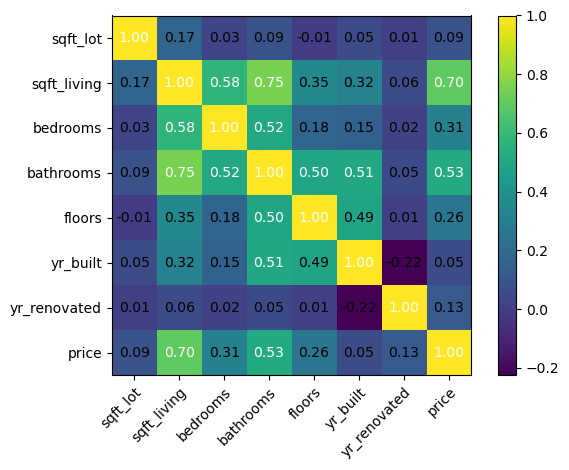

In [7]:
from mlxtend.plotting import heatmap

hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
plt.show()

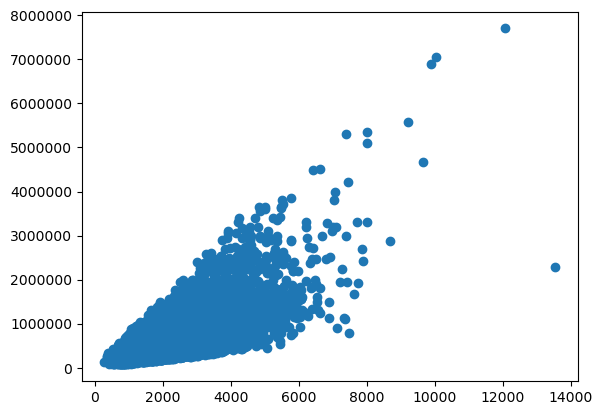

In [8]:
import matplotlib.ticker as mticker

plt.scatter(df['sqft_living'], df['price'])

ax = plt.gca()

# Use ScalarFormatter to format y-axis
ax.yaxis.get_major_formatter().set_scientific(False)

plt.show()

## Model building

In [9]:
X, y = df['sqft_living'], df['price']

X.shape, y.shape

((21613,), (21613,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
  X.values.reshape(-1, 1), 
  y.values.reshape(-1, 1), 
  test_size=0.2, 
  random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 1), (4323, 1), (17290, 1), (4323, 1))

In [11]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_[0], model.intercept_

(array([279.55477932]), array([-41999.18603996]))

In [13]:
y_pred = model.predict(X_test)

y_pred.shape

(4323, 1)

In [14]:
mean_absolute_error(y_test, y_pred)

177867.54034434995

In [15]:
# Let's visualize

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

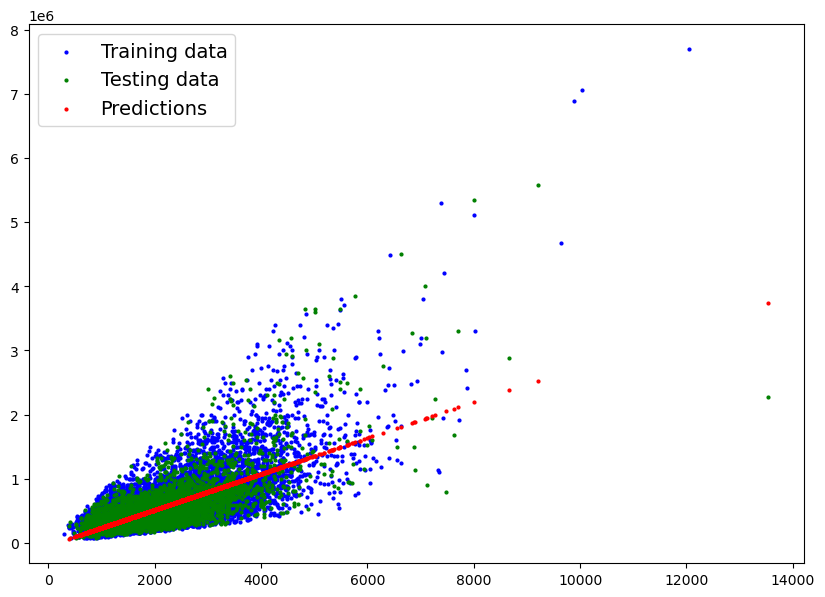

In [16]:
plot_predictions(predictions=y_pred)

In [17]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train.squeeze(), y_train_pred.squeeze())
test_r2 = r2_score(y_test.squeeze(), y_test_pred.squeeze())

print(f'R^2 (train): {train_r2:.2f}, R^2 (test): {test_r2:.2f}')

R^2 (train): 0.49, R^2 (test): 0.49
